# Examinations for September – December 2022 Semester

In [99]:
#Course Code : IS 503

#Programme(s) : Master of Science in Comp (Comp. Security)

#Year of Study :  One

#Course Name : Data Mining

#School of Computing and Engineering

In [100]:
#Name: Mwanje Musa
#Reg No: MAY22/MSC/1615U 

# Section B (60 Marks)

# Question Two

In [160]:
#defining imports 
import pandas as pd 
import numpy as np 
import requests
import matplotlib.pyplot as plt 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
plt.style.use('fivethirtyeight')
%matplotlib inline

# a) Clean the data set. (5 marks)

In [161]:
#read data from url 
data = requests.get('https://www.worldometers.info/population/countries-in-africa-by-population/')
data_tables = pd.read_html(data.text)
#reading the data set for African Countries by population (2022)
table_df = data_tables[0]
table_df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,Nigeria,206139589,2.58 %,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
1,2,Ethiopia,114963588,2.57 %,2884858,115,1000000,30000.0,4.3,19,21 %,1.47 %
2,3,Egypt,102334404,1.94 %,1946331,103,995450,-38033.0,3.3,25,43 %,1.31 %
3,4,DR Congo,89561403,3.19 %,2770836,40,2267050,23861.0,6.0,17,46 %,1.15 %
4,5,South Africa,59308690,1.28 %,750420,49,1213090,145405.0,2.4,28,67 %,0.76 %
5,6,Tanzania,59734218,2.98 %,1728755,67,885800,-40076.0,4.9,18,37 %,0.77 %
6,7,Kenya,53771296,2.28 %,1197323,94,569140,-10000.0,3.5,20,28 %,0.69 %
7,8,Uganda,45741007,3.32 %,1471413,229,199810,168694.0,5.0,17,26 %,0.59 %
8,9,Algeria,43851044,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
9,10,Sudan,43849260,2.42 %,1036022,25,1765048,-50000.0,4.4,20,35 %,0.56 %


In [162]:
table_df.dtypes

#                            int64
Country (or dependency)     object
Population  (2020)           int64
Yearly  Change              object
Net  Change                  int64
Density  (P/Km²)             int64
Land Area  (Km²)             int64
Migrants  (net)            float64
Fert.  Rate                 object
Med.  Age                   object
Urban  Pop %                object
World  Share                object
dtype: object

In [165]:
df1 = table_df.drop(['#','Country (or dependency)', 'Yearly  Change','Migrants  (net)', 'Urban  Pop %','World  Share'], axis=1)

In [166]:
df1.describe()

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²)
count,5.800000e+01,5.800000e+01,58.000000,5.800000e+01
mean,2.311376e+07,5.609302e+05,119.000000,5.111807e+05
std,3.506169e+07,8.830142e+05,158.623907,5.848486e+05
min,6.077000e+03,1.800000e+01,2.000000,3.750000e+02
25%,2.257207e+06,4.729175e+04,25.000000,2.868000e+04
50%,1.200699e+07,2.697525e+05,61.500000,2.698000e+05
75%,2.740473e+07,6.675448e+05,131.500000,8.140625e+05
max,2.061396e+08,5.175990e+06,728.000000,2.381740e+06


# c) Also, write lines of code that can produce the Figure (1b) and use it to answer questions

In [170]:
pip install seaborn

     |████████████████████████████████| 288 kB 611 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/var/folders/jd/tc3c_86n42jc_mmcmstnnxz80000gn/T/ipykernel_17926/2880674030.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(table_df.corr(method ='pearson'), annot=True)


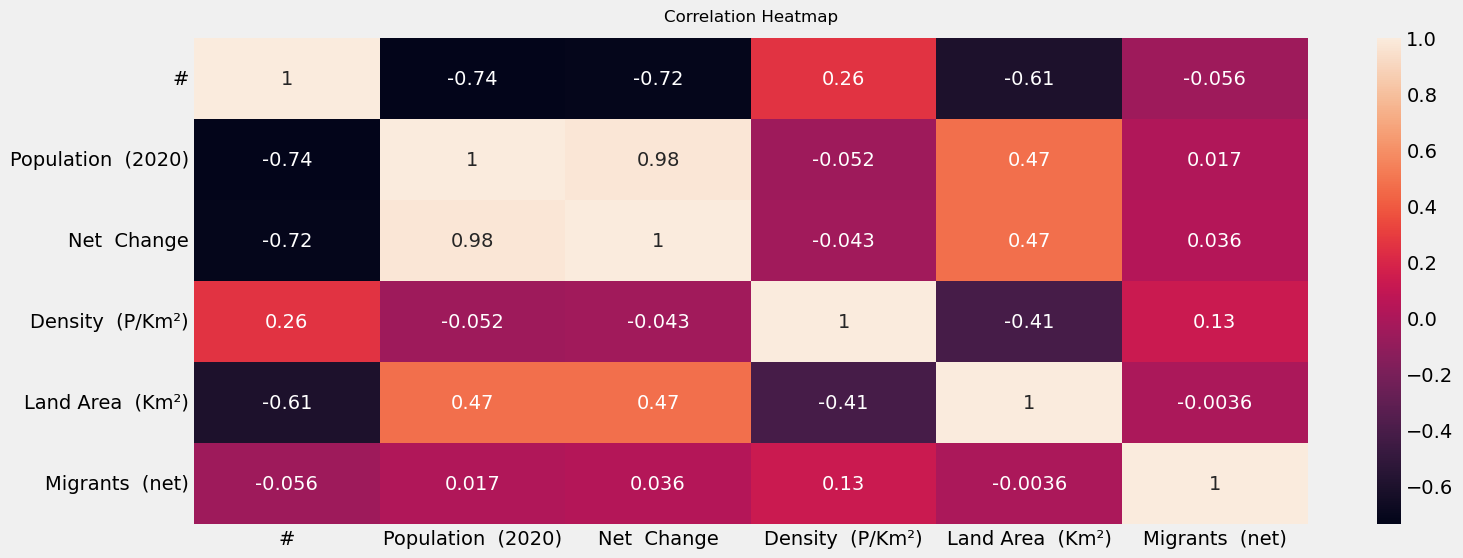

In [171]:
import seaborn as sns

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(table_df.corr(method ='pearson'), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# d) Explain the meanings of the different color seen in the figure. (5 marks)

# Question Four

In [104]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [140]:
#import necessary packages 
import urllib.request as urllib
import cv2 
from IPython.display import display, clear_output
%matplotlib inline

In [141]:
#get image by url of Second image
resp = urllib.urlopen("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png")
Baboon = np.asarray(bytearray(resp.read()), dtype="uint8")
Baboon = cv2.imdecode(Baboon, cv2.IMREAD_COLOR)

a) Take the Screen shot of your codes and output. (10 marks)

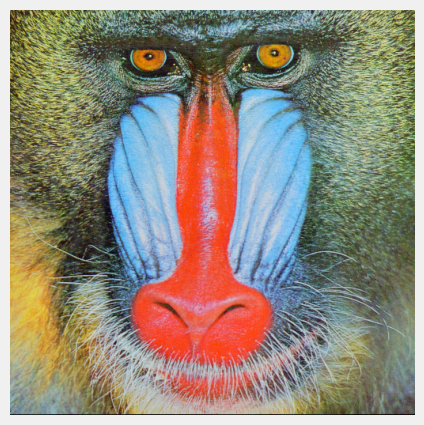

In [149]:
plt.figure(figsize=(5,5))  
plt.axis('off')
plt.imshow(cv2.cvtColor(Baboon, cv2.COLOR_BGR2RGB))
plt.show()

b) Take the Screen shot of your codes and output (10 marks)

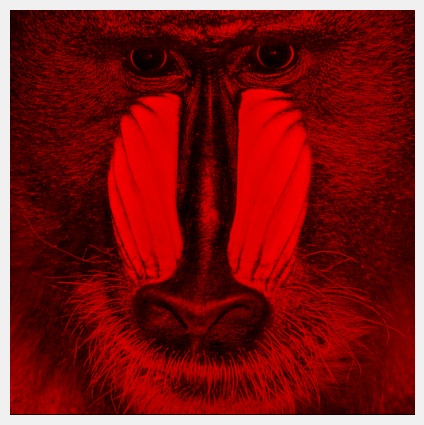

In [148]:
#create a new array baboon_red and set all but the red color channels to zero
baboon_red = gray_baboon.copy()
baboon_red[:, :, 0] = 0
baboon_red[:, :, 1] = 0
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))
plt.show()

# Question FIVE

a) Take the Screen shot of your codes and output. (10 marks)

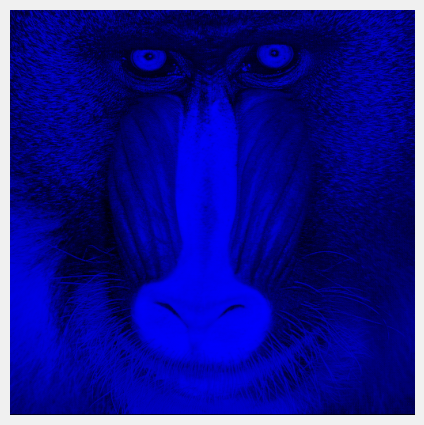

In [123]:
#gray_baboon = cv2.cvtColor(Baboon, cv2.COLOR_BGR2RGB)

baboon_blue = gray_baboon.copy()
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


b) Take the Screen shot of your codes and output. (10 marks)

In [124]:
#We can obtain the different RGB colors and assign them to the variables blue, green, and red, in (B, G, R) format.
blue, green, red = gray_baboon[:, :, 0], gray_baboon[:, :, 1], gray_baboon[:, :, 2]

In [125]:
#We can concatenate each image channel the images using the function vconcat.
im_bgr = cv2.vconcat([blue, green, red])

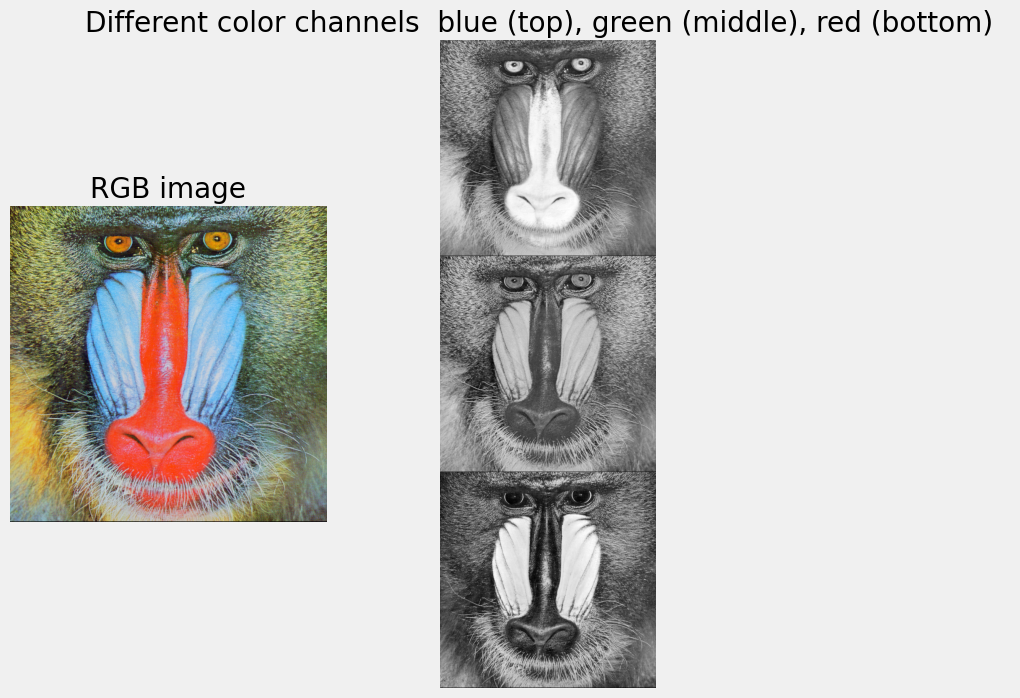

In [126]:
#lotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.axis('off')
plt.imshow(cv2.cvtColor(Baboon, cv2.COLOR_BGR2RGB)) 
plt.title("RGB image")
plt.subplot(122)
plt.axis('off')
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

# Section A (40 Marks)

# Question One

b.) Write codes using python 3.8 or higher to detect the face of greatest Footballer in the URL:

In [131]:
resp = urllib.urlopen("https://img.a.transfermarkt.technology/portrait/big/28003-1631171950.jpg?lm=1")
messi_smile = np.asarray(bytearray(resp.read()), dtype="uint8")
messi_smile = cv2.imdecode(messi_smile, cv2.IMREAD_COLOR)

In [132]:
resp = urllib.urlopen("https://phantom-marca.unidadeditorial.es/096cb395e0821d1b79cfa498ca429d04/resize/1320/f/webp/assets/multimedia/imagenes/2022/12/10/16706269918207.jpg")
messi = np.asarray(bytearray(resp.read()), dtype="uint8")
messi = cv2.imdecode(messi, cv2.IMREAD_COLOR)

Text(0.5, 1.0, 'Messi_smile')

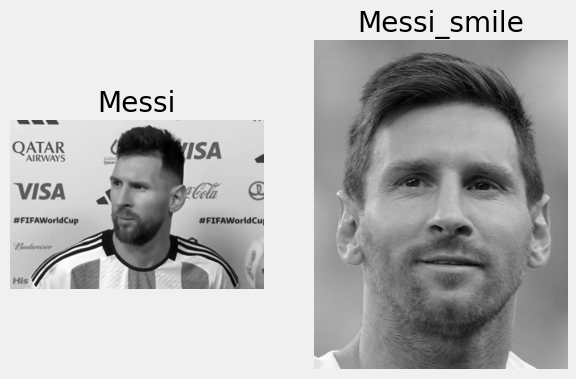

In [133]:
fig, ax = plt.subplots(1, 2)
clear_output()
ax[0].imshow(cv2.cvtColor(messi, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Messi')
ax[1].imshow(cv2.cvtColor(messi_smile, cv2.COLOR_BGR2GRAY), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Messi_smile')

c) Visualize the outcome of the algorithm by drawing a red rectangle around the smiling face of
Mr. Messi detected by the algorithm as shown in out[30]. (10 marks)

In [134]:
# path to the file containing the features that the openCv pipeline will look for in the frame
cascadePath = "Images/haarcascade_frontalface_default.xml"
# initialize a model for detecting whether a certain portion of an image contains a face
faceCascade = cv2.CascadeClassifier(cascadePath)

In [136]:
gray_messi= cv2.cvtColor(messi_smile, cv2.COLOR_BGR2RGB)

In [137]:
faces = faceCascade.detectMultiScale(
        gray_messi,
        scaleFactor=1.1,
        minNeighbors=6,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    ) 
faces

array([[ 42,  78, 234, 234]], dtype=int32)

(-0.5, 299.5, 389.5, -0.5)

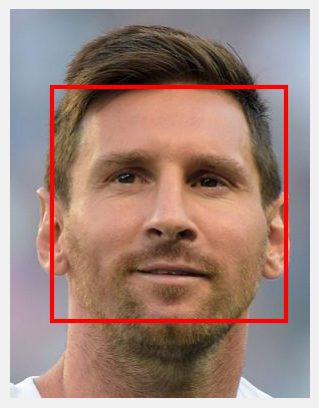

In [139]:
# draw a rectangle
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(gray_messi, cmap='gray')

for face in faces:    
    (x_messi, y_messi, w_messi, h_messi) = face
    ax.add_artist(Rectangle((x_messi, y_messi), w_messi, h_messi, fill=False, lw=3, color='red'))

ax.axis('off')

i.) True Positive values. (4 marks)